# DEA Notebook 

![alt text](../dea-gallery-crop.png "DEA")

### [DEA](https://dea.destine.eu/web) is a Content creation service and no-code platform for DestinE storytelling and data visualization

# Explore  Climate Plots via DEA API

This notebook demonstrates how to **search, filter, and download climate trends** using the **DEA Plot API**. These plots are associated with specific administrative regions (e.g., countries, cities), climate variables (e.g., 2 metre temperature, Sea surface temperature) from ERA5 or Destine, visualisation styles (e.g., spirals, stripes, bars), and different reference periods (pre-industrial CMIP6 data, or ERA5 1990-2020).

> These plots are especially useful when a quick overview of long-term climate trends is needed without having to compute the data from scratch.

By the end of this notebook, you will be able to:

- Search for a country or city using the `/api/places/search` DEA endpoint  
- Retrieve the list of available precomputed plots for that place  
- Filter and select a specific plot type (e.g., spiral, bar, stripe)  
- Download the associated image, video, or raw data (JSON format) for offline use or display
- Use the dat for your custom plot

---

## API-to-Plot Workflow

This is the general structure of the workflow:

📌 **Search a place**  
└── Use the `/api/places/search?fts=austria` endpoint to find a region by name  

📦 **Get the plot metadata**  
└── The returned JSON includes a list of associated climate plots with their metadata (description, period, reference, etc.)  

🔎 **Filter by type or variable**  
└── Select a plot of interest (e.g., spiral showing temperature anomalies)  

⬇️ **Request the image/video/raw data**  
└── Download the visual content (image/video) or the raw values (JSON)  

---

## Notebook Agenda

1. **Load Dependencies**  
2. **Search for a Country or Region**  
3. **Inspect the List of Available Climate Plots**  
4. **Filter by Plot Type or Variable**  
5. **Download a Selected Plot (Image, Video, or Raw Data)**  
6. **Use the Data or Media in Custom Applications** [EXTRA!]

# 1. Load Dependencies

This notebook doesn't require the installation of any prerequisites, only the import of necessary modules.

In [1]:
import requests
import os
from IPython.display import Image # to see the image insiede the notebook

# 2. Search for a Country or Region

In this step, we search for climate plots associated with a given **country or administrative region** using the `/api/places/search` endpoint.

In this example, we look for the **climate trend plots for Austria**.  
You can change the query by simply replacing the `place` variable with another country or city name (e.g. `"germany"`, `"france"`, `"madrid"`).

In [2]:
place = 'austria'

### Execute the query

In [3]:
search_url = f"https://dea.destine.eu/api/places/search?fts={place}"
response = requests.get(search_url)
places = response.json()

# 3. Inspect and Filter Available Climate Plots

Each place result contains a list of available climate plots under the `"plot"` key.  
These include **stripe plots**, **spiral plots**, **bar charts**, each based on different reference periods and variables.

We can filter this list to explore only the plot metadata and decide which one to download or analyse.


In [4]:
# Get first matching place (e.g. Austria)
austria = places[0]

# Extract metadata and associated plots
print("Place:", austria["name"])
print("Geometry type:", austria["geometry_type"])
print("Number of available plots:", len(austria["plot"]))
print("")

# Show available plot types and titles
for p in austria["plot"][:5]:
    print(f"{p['title']} \n plot style: {p['type']} \n id: {p['id']} \n resolution: {p['anomaly_resolution']} \n reference: {p['reference_description']}")
    print("")

Place: Austria
Geometry type: Polygon
Number of available plots: 24

ERA5 hourly data on single levels t2m Climate Bar for Austria 
 plot style: Bar 
 id: 300 
 resolution: yearly 
 reference: ERA5 near-past reference period [1990-2019]

ERA5 hourly data on single levels t2m Climate Spiral for Austria 
 plot style: Spiral 
 id: 295 
 resolution: yearly 
 reference: CMIP6 pre-industrial reference period [1850-1900]

ERA5 hourly data on single levels t2m Climate Bar for Austria 
 plot style: Bar 
 id: 297 
 resolution: yearly 
 reference: CMIP6 pre-industrial reference period [1850-1900]

ERA5 hourly data on single levels t2m Climate Stripe for Austria 
 plot style: Stripe 
 id: 299 
 resolution: yearly 
 reference: ERA5 near-past reference period [1990-2019]

ERA5 hourly data on single levels t2m Climate Stripe for Austria 
 plot style: Stripe 
 id: 296 
 resolution: yearly 
 reference: CMIP6 pre-industrial reference period [1850-1900]



# 4. Filter by Plot Type or Variable

The DEA database offers a range of precomputed climate plots, each linked to a specific variable, data source, plot style, and reference period. To help narrow down the results, we can apply filters on multiple attributes of each plot entry.

Each plot record in the database includes fields such as:

- **title**: Human-readable title of the plot

- **type**: Plot style (Spiral, Stripe, Bar)

- **data_var**: Variable name (e.g., t2m for air temperature, sst for sea surface temperature)

- **anomaly_resolution**: Temporal resolution of the anomalies (yearly or monthly)

- **data_origin**: The dataset used (e.g., ERA5, DestinE)

- **reference_description**: Description of the baseline period for anomalies


We can define filters using the following configuration:

In [5]:
# Filter configuration
data_source_filter = "ERA5"       # Options: "ERA5", "DestinE", "ERA5 + DestinE"
plot_type_filter = None           # Options: "Spiral", "Stripe", "Bar", None for all
variable_filter = None            # Options: "t2m", "sst"
resolution_filter = "yearly"      # Options: "yearly", "monthly" (only for spiral)
reference_filter = "ERA5"         # Options: "ERA5", "CMIP6"

In [6]:
# Apply filters and print matching plots
for p in austria["plot"]:
    title = p["title"]
    plot_type = p["type"]
    var_name = p["data_var"]
    resolution = p["anomaly_resolution"]
    data_origin = p["data_origin"]
    
    # Apply filters
    if data_source_filter and data_source_filter != data_origin:
        continue
    if plot_type_filter and plot_type != plot_type_filter:
        continue
    if variable_filter and variable_filter != var_name:
        continue
    if resolution_filter and resolution != resolution_filter:
        continue
    if reference_filter and reference_filter not in title:
        continue

    # Print matched plot metadata
    print(f"{title}")
    print(f"• Plot style     : {plot_type}")
    print(f"• Variable       : {var_name}")
    print(f"• Resolution     : {p['anomaly_resolution']}")
    print(f"• Reference      : {p['reference_description']}")
    print(f"• Plot ID        : {p['id']}")
    
    print("")

ERA5 hourly data on single levels t2m Climate Bar for Austria
• Plot style     : Bar
• Variable       : t2m
• Resolution     : yearly
• Reference      : ERA5 near-past reference period [1990-2019]
• Plot ID        : 300

ERA5 hourly data on single levels t2m Climate Spiral for Austria
• Plot style     : Spiral
• Variable       : t2m
• Resolution     : yearly
• Reference      : CMIP6 pre-industrial reference period [1850-1900]
• Plot ID        : 295

ERA5 hourly data on single levels t2m Climate Bar for Austria
• Plot style     : Bar
• Variable       : t2m
• Resolution     : yearly
• Reference      : CMIP6 pre-industrial reference period [1850-1900]
• Plot ID        : 297

ERA5 hourly data on single levels t2m Climate Stripe for Austria
• Plot style     : Stripe
• Variable       : t2m
• Resolution     : yearly
• Reference      : ERA5 near-past reference period [1990-2019]
• Plot ID        : 299

ERA5 hourly data on single levels t2m Climate Stripe for Austria
• Plot style     : Stripe
•

# 5. Download a Selected Plot (Image, Video, or JSON Data)

In this section, we demonstrate how to retrieve and download a trend plot or data from the DEA Plot API.
The result of the request can be in image, video, or raw data in JSON format, depending on the type requested.

To do so, we use the **/py-api/climate_plot** endpoint with the following two parameters:

- **id**: the plot ID (as retrieved from the metadata query)

- **type**: one of "image", "video", or "json"

Specifically, the type choice returns:

- **image** – returns a PNG image of the plot

- **video** – returns an MP4 animation (if available)

- **json** – returns the raw data values in JSON format (e.g. for custom visualisation)


If the response contains a valid file (image, video, or JSON), it is saved locally using the appropriate extension.
The content type returned by the server is automatically used to determine the correct file format.

This allows you to reuse the downloaded plot or data in custom workflows, reports, or applications.

In [7]:
# Define the parameters
plot_id = 299
plot_type = "image"  # image, video, json
headers = {
    "User-Agent": "Mozilla/5.0"  # Simulate a browser
}

In [8]:
# Build the request and compute it
meta_url = f"https://dea.destine.eu/py-api/climate_plot?id={plot_id}&type={plot_type}"
meta_resp = requests.get(meta_url, headers=headers)
meta_url

'https://dea.destine.eu/py-api/climate_plot?id=299&type=image'

In [9]:
# Detect content type and file extension
content_type = meta_resp.headers.get("Content-Type", "")
ext_map = {
    "image": "png",
    "video": "mp4",
    "json": "json"
}

# Identify file extension
ext = next((v for k, v in ext_map.items() if k in content_type), None)

# Save the output if correct
output_dir = "climate_trends_output"
os.makedirs(output_dir, exist_ok=True)

if meta_resp.status_code == 200 and ext:
    filename = f"climate_plot_{plot_id}.{ext}"
    filepath = os.path.join(output_dir, filename)
    with open(filepath, "wb") as f:
        f.write(meta_resp.content)
    print(f"✅ File saved successfully as {filepath}")
else:
    print("❌ Failed to download")
    print("Status code:", meta_resp.status_code)
    print("Content-Type:", content_type)
    print("Content (first 200 bytes):", meta_resp.content[:200])


✅ File saved successfully as climate_trends_output/climate_plot_299.png


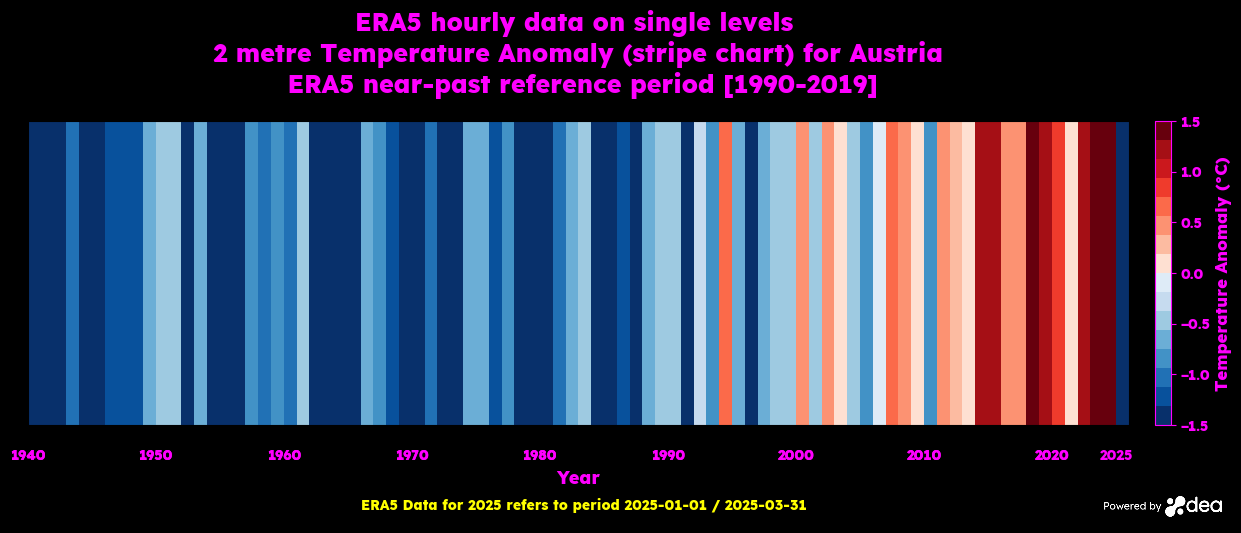

In [10]:
Image(filename=filepath)

# EXTRA!

# 6. Use the Data or Media in Custom Applications

In [11]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib

### - Custom graph with yearly data

In [12]:
# Define the parameters
plot_id = 299
plot_type = "json"  # image, video, json
headers = {
    "User-Agent": "Mozilla/5.0"  # Simulate a browser
}
# Build the request and compute it
meta_url = f"https://dea.destine.eu/py-api/climate_plot?id={plot_id}&type={plot_type}"
meta_resp = requests.get(meta_url, headers=headers)
# Detect content type and file extension
content_type = meta_resp.headers.get("Content-Type", "")
ext_map = {
    "image": "png",
    "video": "mp4",
    "json": "json"
}

# Identify file extension
ext = next((v for k, v in ext_map.items() if k in content_type), None)

# Save the output if correct
output_dir = "climate_trends_output"
os.makedirs(output_dir, exist_ok=True)

if meta_resp.status_code == 200 and ext:
    filename = f"climate_plot_{plot_id}.{ext}"
    filepath = os.path.join(output_dir, filename)
    with open(filepath, "wb") as f:
        f.write(meta_resp.content)
    print(f"✅ File saved successfully as {filepath}")
else:
    print("❌ Failed to download")
    print("Status code:", meta_resp.status_code)
    print("Content-Type:", content_type)
    print("Content (first 200 bytes):", meta_resp.content[:200])


✅ File saved successfully as climate_trends_output/climate_plot_299.json


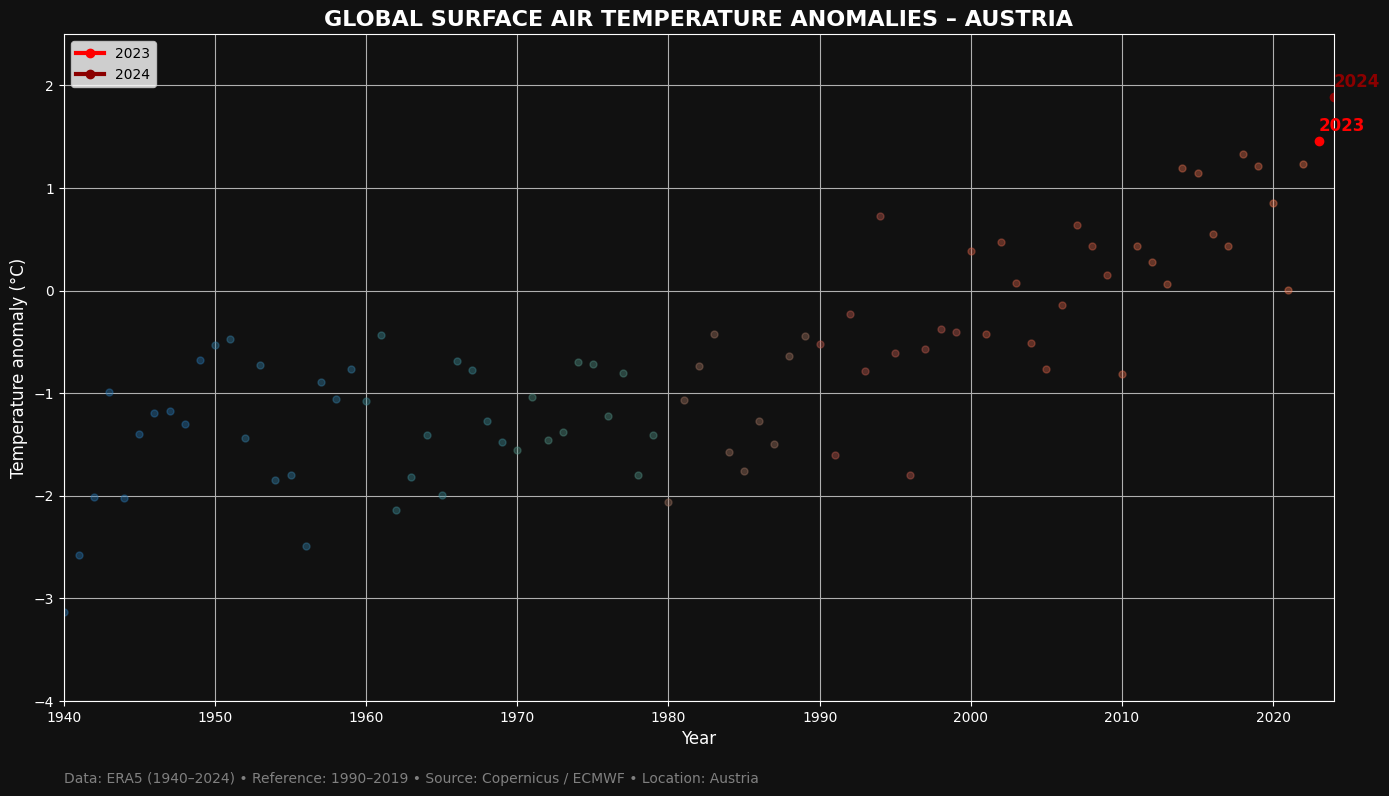

In [13]:
# Load JSON
with open(filepath) as f:
    raw = json.load(f)

# Extract data from response
df = pd.DataFrame(raw["data"])

# Filter data only for full years (exclude current year)
df = df[df['year'] <= 2024]

# Custom colormap
decade_colors = {
    '1940s': '#2878B5',
    '1950s': '#3481A9',
    '1960s': '#3D8C98',
    '1970s': '#519286',
    '1980s': '#A07361',
    '1990s': '#C25B4E',
    '2000s': '#D65F46',
    '2010s': '#E16D4C',
    '2020s': '#F3774F',
}

def get_decade_label(year):
    return f"{int(year//10)*10}s"

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
for _, row in df.iterrows():
    year = row['year']
    anomaly = row['anomaly']
    decade = get_decade_label(year)
    color = decade_colors.get(decade, '#AAAAAA')

    if year == 2023:
        ax.plot([year], [anomaly], 'o-', color='red', markersize=6, linewidth=3, label="2023")
        ax.text(year, anomaly + 0.1, str(year), color='red', fontsize=12, fontweight='bold')
    elif year == 2024:
        ax.plot([year], [anomaly], 'o-', color='darkred', markersize=6, linewidth=3, label="2024")
        ax.text(year, anomaly + 0.1, str(year), color='darkred', fontsize=12, fontweight='bold')
    else:
        ax.plot([year], [anomaly], 'o-', color=color, alpha=0.4, markersize=5)

# Set graph style
ax.set_facecolor('#111111')
fig.patch.set_facecolor('#111111')
ax.tick_params(colors='white', labelsize=10)
ax.set_xlim(df['year'].min(), df['year'].max())
ax.set_ylim(-4, 2.5)
ax.set_ylabel("Temperature anomaly (°C)", color='white', fontsize=12)
ax.set_xlabel("Year", color='white', fontsize=12)
ax.set_title("GLOBAL SURFACE AIR TEMPERATURE ANOMALIES – AUSTRIA", color='white', fontsize=16, weight='bold')
ax.grid()

# Note
ax.text(df['year'].min(), -4.8,
        f"Data: ERA5 (1940–2024) • Reference: 1990–2019 • Source: Copernicus / ECMWF • Location: Austria",
        color="gray", fontsize=10)

ax.spines[:].set_color('white')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


### - Custom graph with monthly data on global scale

In [14]:
place = 'global'

# Query API
search_url = f"https://dea.destine.eu/api/places/search?fts={place}"
response = requests.get(search_url)
places = response.json()


# Get first matching place (e.g. Austria)
globe = places[0]

# Extract metadata and associated plots
print("Place:", globe["name"])
print("Geometry type:", globe["geometry_type"])
print("Number of available plots:", len(globe["plot"]))
print("")

# Show available plot types and titles
for p in globe["plot"][:5]:
    print(f"{p['title']} \n plot style: {p['type']} \n id: {p['id']} \n resolution: {p['anomaly_resolution']} \n reference: {p['reference_description']}")
    print("")

Place: Global
Geometry type: Feature
Number of available plots: 32

ERA5 hourly data on single levels t2m Climate Spiral for Global 
 plot style: Spiral 
 id: 487 
 resolution: yearly 
 reference: ERA5 near-past reference period [1990-2019]

ERA5 hourly data on single levels t2m Climate Stripe for Global 
 plot style: Stripe 
 id: 488 
 resolution: yearly 
 reference: ERA5 near-past reference period [1990-2019]

ERA5 hourly data on single levels t2m Climate Stripe for Global 
 plot style: Stripe 
 id: 485 
 resolution: yearly 
 reference: CMIP6 pre-industrial reference period [1850-1900]

ERA5 hourly data on single levels t2m Climate Bar for Global 
 plot style: Bar 
 id: 486 
 resolution: yearly 
 reference: CMIP6 pre-industrial reference period [1850-1900]

ERA5 hourly data on single levels t2m Climate Spiral for Global 
 plot style: Spiral 
 id: 652 
 resolution: monthly 
 reference: ERA5 near-past reference period [1990-2019]



In [15]:
# Define the parameters
plot_id = 652
plot_type = "json"  # image, video, raw
headers = {
    "User-Agent": "Mozilla/5.0"  # Simulate a browser
}


# Build the request and compute it
meta_url = f"https://dea.destine.eu/py-api/climate_plot?id={plot_id}&type={plot_type}"
meta_resp = requests.get(meta_url, headers=headers)
meta_url

'https://dea.destine.eu/py-api/climate_plot?id=652&type=json'

In [16]:
# Detect content type and file extension
content_type = meta_resp.headers.get("Content-Type", "")
ext_map = {
    "image": "png",
    "video": "mp4",
    "json": "json"
}

# Identify file extension
ext = next((v for k, v in ext_map.items() if k in content_type), None)

# Save the output if correct
output_dir = "climate_trends_output"
os.makedirs(output_dir, exist_ok=True)

if meta_resp.status_code == 200 and ext:
    filename = f"climate_plot_{plot_id}.{ext}"
    filepath = os.path.join(output_dir, filename)

    with open(filepath, "wb") as f:
        f.write(meta_resp.content)
    print(f"✅ File saved successfully as {filepath}")
else:
    print("❌ Failed to download")
    print("Status code:", meta_resp.status_code)
    print("Content-Type:", content_type)
    print("Content (first 200 bytes):", meta_resp.content[:200])


✅ File saved successfully as climate_trends_output/climate_plot_652.json


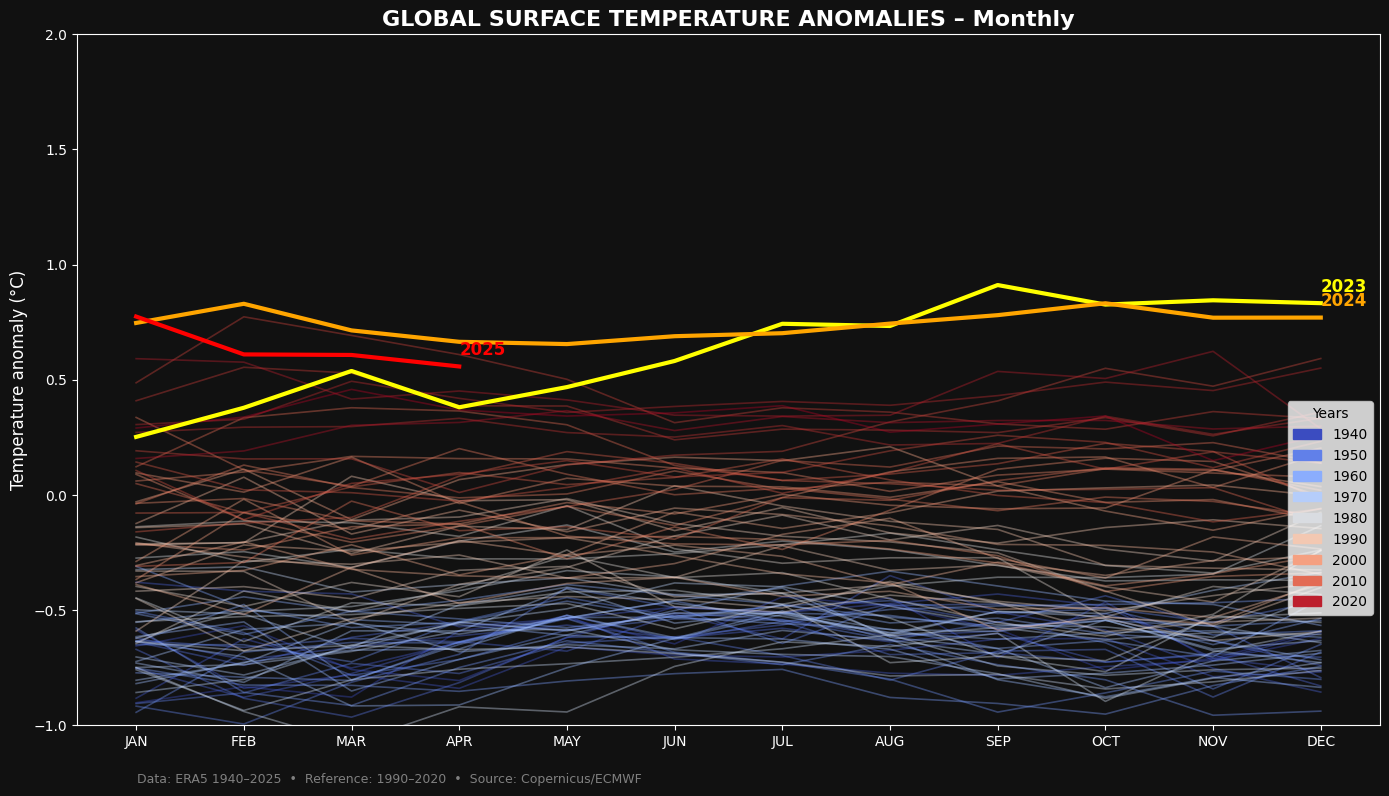

In [17]:
# Load data
with open(filepath) as f:
    raw = json.load(f)
df = pd.DataFrame(raw["data"])

# Organise monthly data
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

# Get first step of month
df_monthly = df.sort_values("date").groupby(["year", "month"]).first().reset_index()
pivot = df_monthly.pivot(index="year", columns="month", values="anomaly").sort_index()

# month label
month_labels = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Latest years label
highlight_years = {2023: 'yellow', 2024: 'orange', 2025: 'red'}

# Colourmap for years
years_for_colormap = [y for y in pivot.index if y not in highlight_years]
norm = mcolors.Normalize(vmin=min(years_for_colormap), vmax=max(years_for_colormap))
cmap = matplotlib.colormaps['coolwarm']  #cm.get_cmap('coolwarm')  # 'RdYlBu_r' 

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

# All years except highlighted
for year in years_for_colormap:
    anomaly_series = pivot.loc[year]
    color = cmap(norm(year))
    ax.plot(month_labels, anomaly_series, color=color, linewidth=1.2, alpha=0.4)

# Only special years
for year, color in highlight_years.items():
    if year in pivot.index:
        anomaly_series = pivot.loc[year]
        ax.plot(month_labels, anomaly_series, color=color, linewidth=3, label=str(year))
        # Place label at the last valid month for each highlighted year
        valid_months = np.where(np.isfinite(anomaly_series))[0]
        if len(valid_months) > 0:
            last_month_idx = valid_months[-1]
            val = anomaly_series.iloc[last_month_idx]
            label_month = month_labels[last_month_idx]
            ax.text(label_month, val + 0.05, str(year), color=color,
                    fontsize=12, fontweight='bold')
# Legend
decade_ticks = list(range(1940, 2030, 10))  # 1940, 1950, ..., 2020
decade_patches = [
    mpatches.Patch(color=cmap(norm(dec)), label=str(dec)) for dec in decade_ticks if dec in years_for_colormap
]
ax.legend(handles=decade_patches, loc='lower right', bbox_to_anchor=(1, 0.15),
          fontsize=10, frameon=True, title="Years")

# Style
ax.set_facecolor("#111111")
fig.patch.set_facecolor('#111111')
ax.tick_params(colors='white')
ax.set_title("GLOBAL SURFACE TEMPERATURE ANOMALIES – Monthly", fontsize=16, color='white', weight='bold')
ax.set_ylabel("Temperature anomaly (°C)", fontsize=12, color='white')
ax.set_xlabel("")
ax.set_ylim(-1, 2)
ax.spines[:].set_color('white')

# Note
ax.text(0.01, -1.25, "Data: ERA5 1940–2025  •  Reference: 1990–2020  •  Source: Copernicus/ECMWF",
        color="gray", fontsize=9)

# Save and preview
plt.tight_layout()
plt.savefig("climate_trends_output/temperature_anomalies_colored_by_year.png", dpi=300, facecolor=fig.get_facecolor())
plt.show()
